# Movie Recommender system 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Movie.csv")
df.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [2]:
df.groupby('movie')['rating'].mean().head()

movie
Father of the Bride Part II (1995)    3.143836
GoldenEye (1995)                      3.427003
Grumpier Old Men (1995)               3.186861
Heat (1995)                           3.836508
Jumanji (1995)                        3.268398
Name: rating, dtype: float64

In [3]:
df.groupby('movie')['rating'].mean().sort_values(ascending=False).head()

movie
Toy Story (1995)       3.959323
Heat (1995)            3.836508
GoldenEye (1995)       3.427003
Sabrina (1995)         3.381429
Tom and Huck (1995)    3.352564
Name: rating, dtype: float64

In [4]:
df.groupby('movie')['rating'].count().sort_values(ascending=False).head()

movie
Toy Story (1995)    2569
GoldenEye (1995)    1548
Heat (1995)         1260
Jumanji (1995)      1155
Sabrina (1995)       700
Name: rating, dtype: int64

In [5]:
movie_ratings_mean_count = pd.DataFrame(df.groupby('movie')['rating'].mean())

In [6]:
movie_ratings_mean_count.head()

,rating
movie,
Father of the Bride Part II (1995),3.143836
GoldenEye (1995),3.427003
Grumpier Old Men (1995),3.186861
Heat (1995),3.836508
Jumanji (1995),3.268398


In [7]:
movie_ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('movie')['rating'].count())

In [8]:
movie_ratings_mean_count.head()

,rating,rating_counts
movie,,
Father of the Bride Part II (1995),3.143836,657
GoldenEye (1995),3.427003,1548
Grumpier Old Men (1995),3.186861,685
Heat (1995),3.836508,1260
Jumanji (1995),3.268398,1155


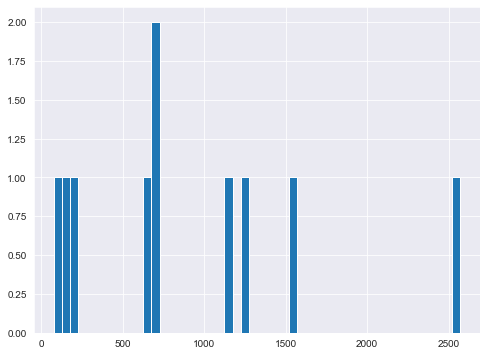

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
movie_ratings_mean_count['rating_counts'].hist(bins=50)

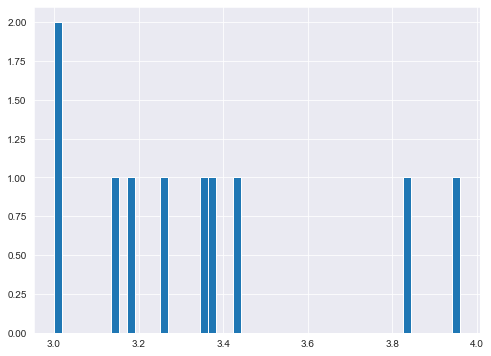

In [10]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
movie_ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

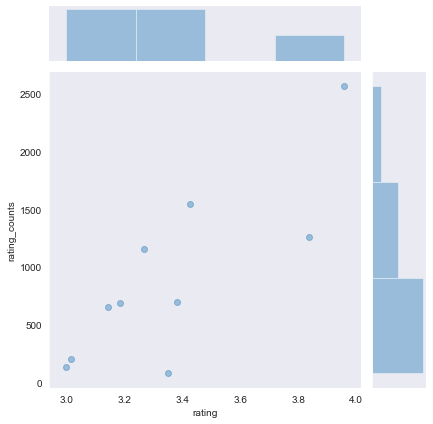

In [11]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=movie_ratings_mean_count, alpha=0.4)

In [12]:
user_movie_rating = df.pivot_table(index='userId', columns='movie', values='rating')

In [13]:
user_movie_rating.head()

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [14]:
jumanji_ratings = user_movie_rating['Jumanji (1995)']

In [15]:
jumanji_ratings.head()

userId
1    3.5
2    NaN
3    NaN
4    NaN
5    3.0
Name: Jumanji (1995), dtype: float64

In [16]:
movies_like_jumanji = user_movie_rating.corrwith(jumanji_ratings)

corr_jumanji = pd.DataFrame(movies_like_jumanji, columns=['Correlation'])
corr_jumanji.dropna(inplace=True)
corr_jumanji.head()

,Correlation
movie,
Father of the Bride Part II (1995),0.483546
GoldenEye (1995),0.311845
Grumpier Old Men (1995),0.349180
Heat (1995),0.174649
Jumanji (1995),1.000000


In [17]:
corr_jumanji .sort_values('Correlation', ascending=False).head(10)

,Correlation
movie,
Jumanji (1995),1.000000
Tom and Huck (1995),0.588355
Father of the Bride Part II (1995),0.483546
Sabrina (1995),0.362817
Grumpier Old Men (1995),0.349180
Toy Story (1995),0.315416
GoldenEye (1995),0.311845
Sudden Death (1995),0.224319
Heat (1995),0.174649
